In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [5]:
cols = ['ID','topic','sentiment','Text']
train = pd.read_csv("twitter_training.csv",names=cols)

In [7]:
train.head()

,ID,topic,sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [9]:
train.shape

(74682, 4)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   topic      74682 non-null  object
 2   sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [13]:
train.describe(include=object)

,topic,sentiment,Text
count,74682,74682,73996
unique,32,4,69491
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [15]:
train['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [19]:
train.isnull().sum()

ID             0
topic          0
sentiment      0
Text         686
dtype: int64

In [23]:
train.dropna(inplace=True)

In [25]:
train.isnull().sum()

ID           0
topic        0
sentiment    0
Text         0
dtype: int64

In [27]:
#checking duplicate values
train.duplicated().sum()

2340

In [29]:
train.drop_duplicates(inplace=True)

In [31]:
train.duplicated().sum()

0

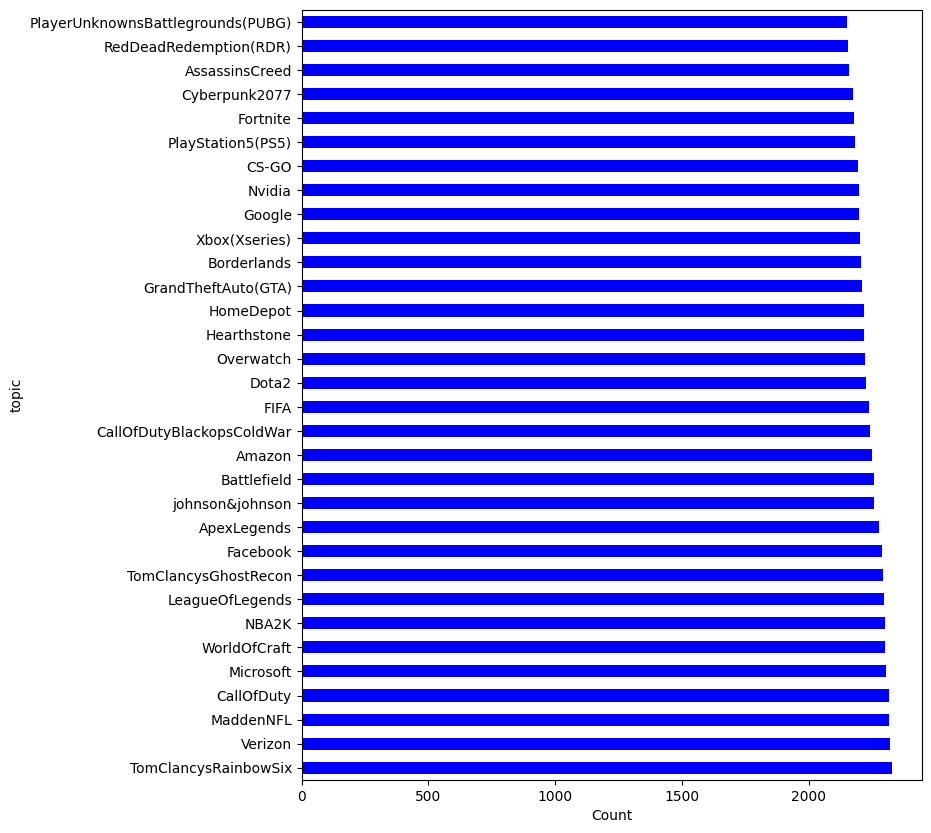

In [47]:
#visualization of count of different topics
plt.figure(figsize=(8,10))
train['topic'].value_counts().plot(kind='barh',color='r')
plt.xlabel("Count")
plt.show()

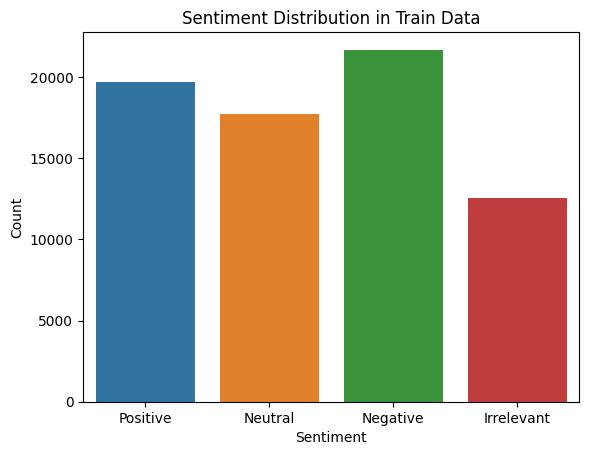

In [59]:
sns.countplot(x='sentiment', data=train, hue='sentiment')  
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution in Train Data")
plt.show()

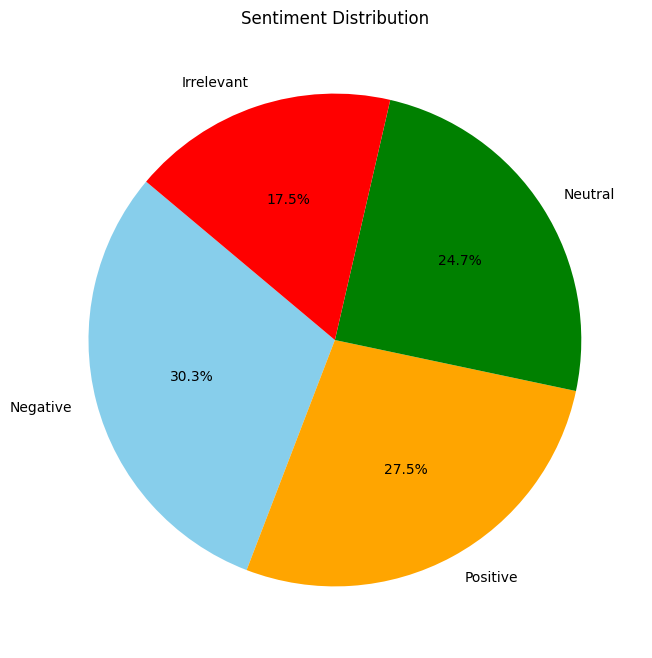

In [61]:
# Calculate the counts for each sentiment
sentiment_counts = train['sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()


In [63]:
train

,ID,topic,sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


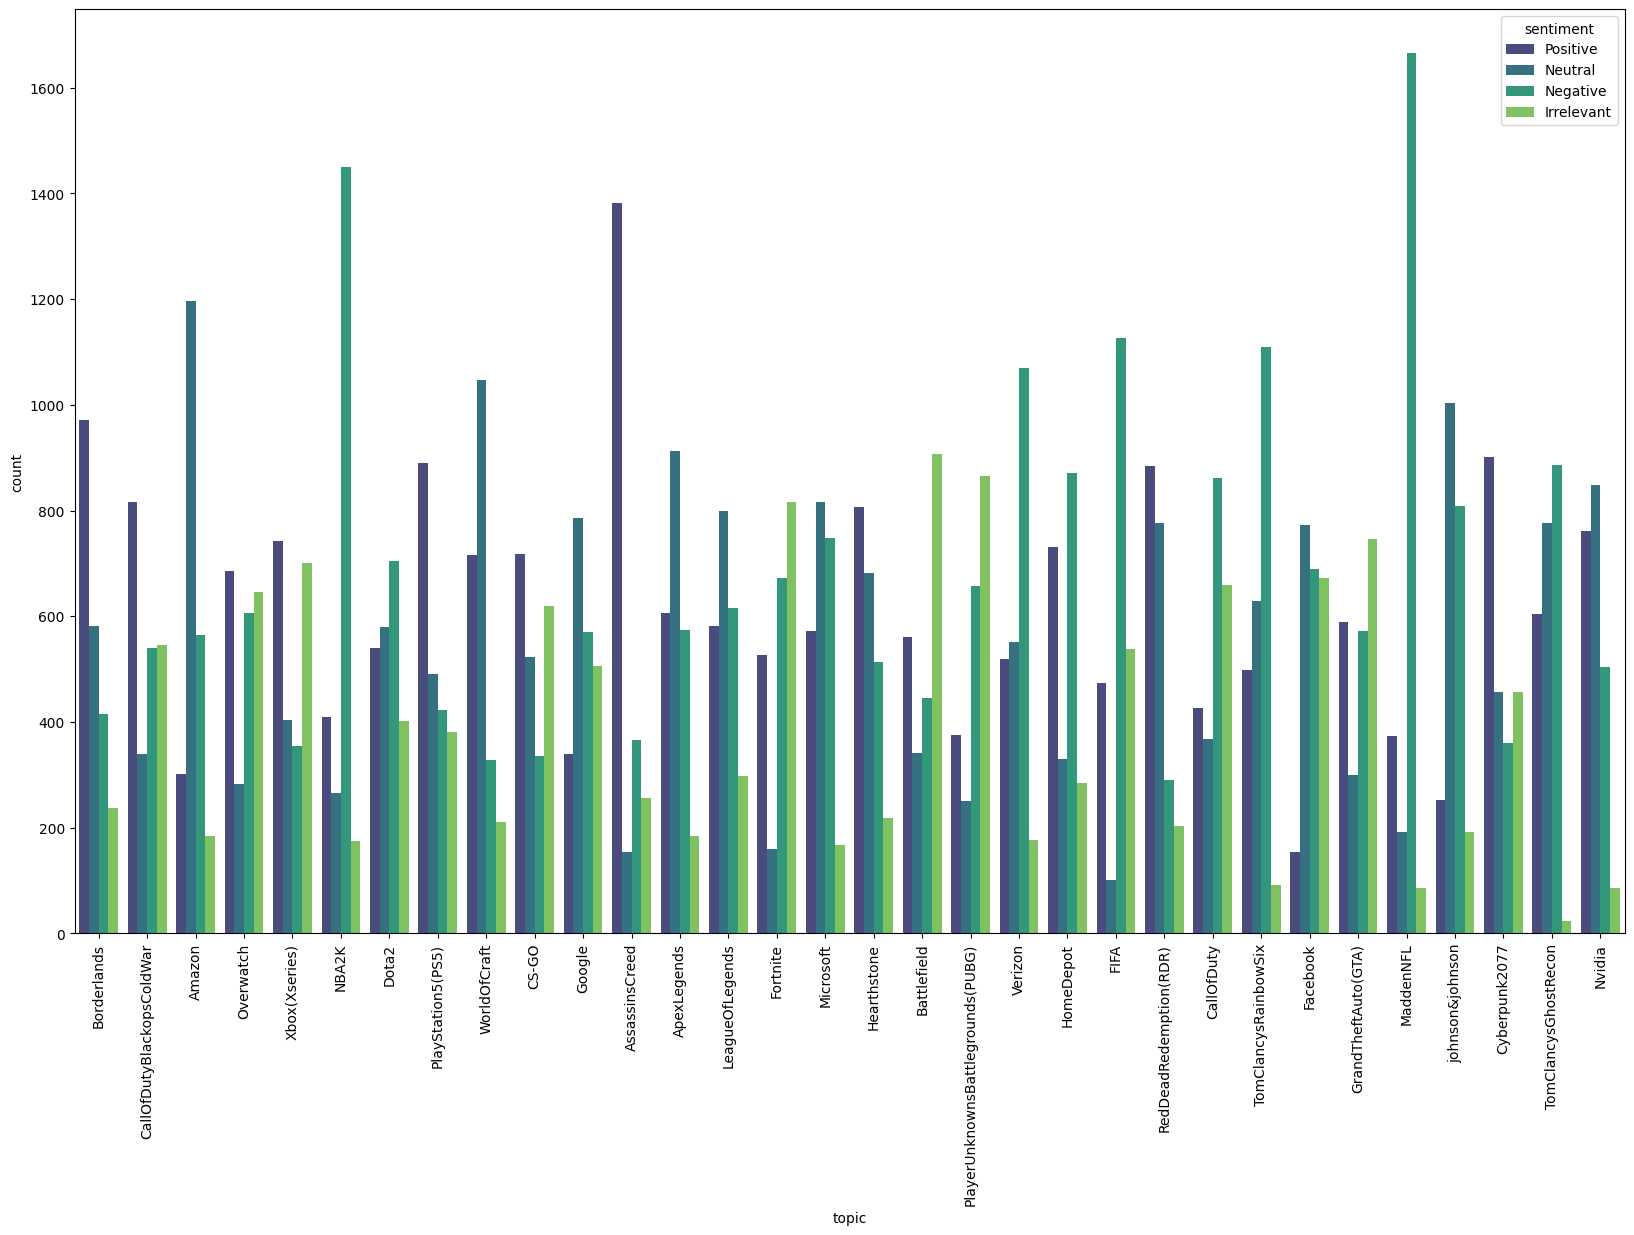

In [65]:
plt.figure(figsize=(20,12))
sns.countplot(x = 'topic',data = train,palette = 'viridis',hue = 'sentiment')
plt.xticks(rotation = 90)
plt.show()

In [69]:
## Group by Topic and Sentiment
topic_wise_sentiment = train.groupby(["topic", "sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = train['topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['topic'].isin(topic_counts)]

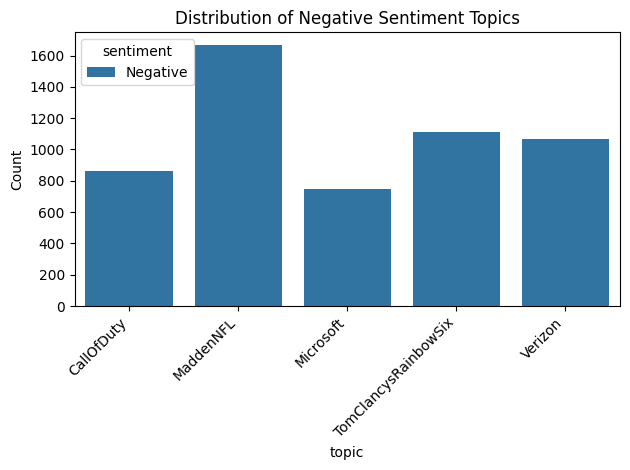

In [75]:
# Assuming your DataFrame is named 'top_topics_sentiment' and has columns 'topic' and 'Count'

# Filter negative sentiment data (optional):
negative_sentiment_data = top_topics_sentiment[top_topics_sentiment['sentiment'] == 'Negative']

# Create the barplot using appropriate hue assignment (recommended)
sns.barplot(x='topic', y='Count', data=negative_sentiment_data, hue='sentiment')

# Customize plot elements (optional)
plt.xlabel("topic")
plt.ylabel("Count")
plt.title("Distribution of Negative Sentiment Topics")
plt.legend(title="sentiment", loc="upper left")  # Add legend if desired
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust spacing for better presentation
plt.show()

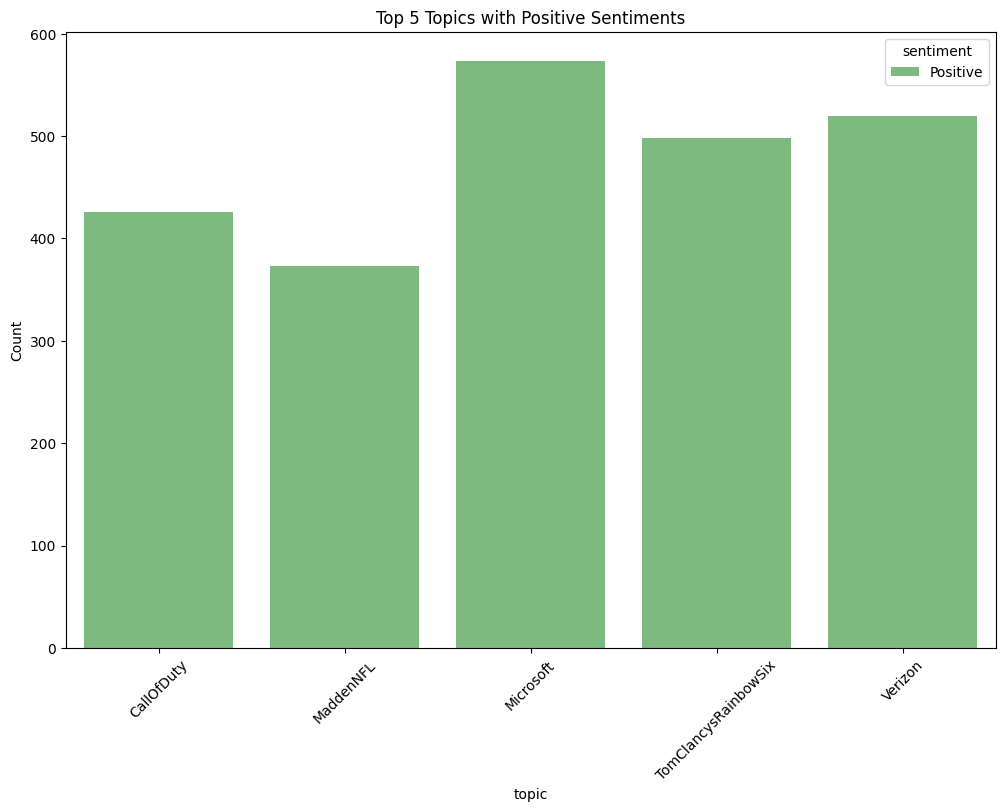

In [79]:
#top 5 topics with positive sentiments
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['sentiment'] == 'Positive'], x='topic', y='Count',hue = 'sentiment', palette='Greens')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

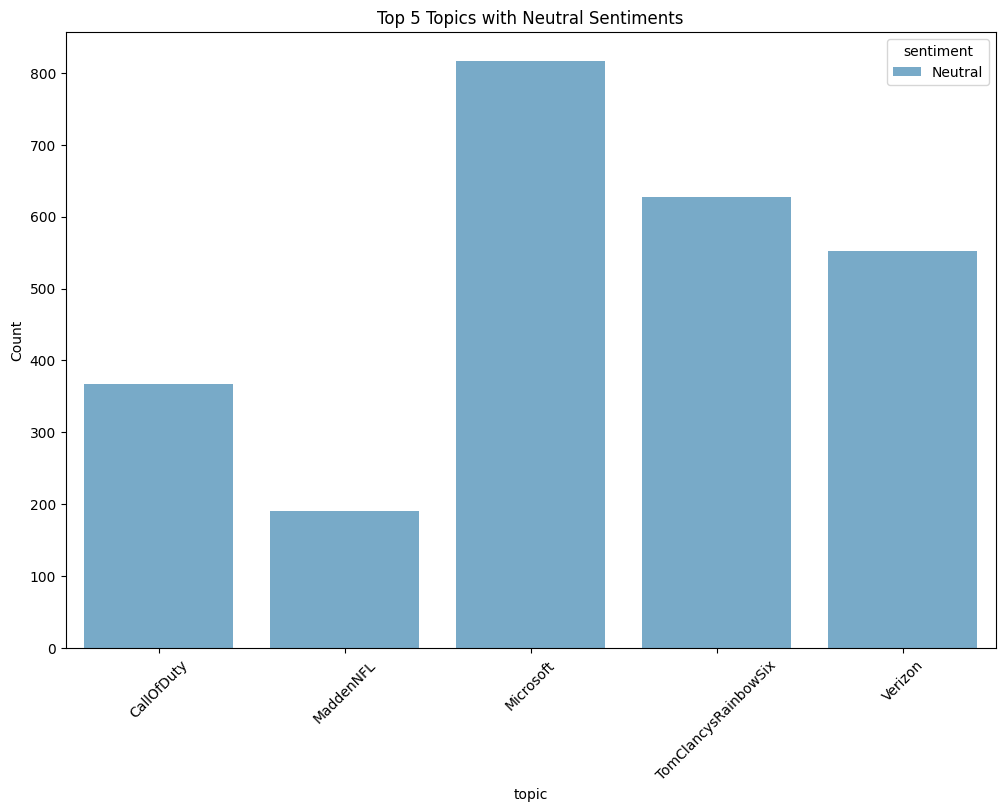

In [84]:
#top 5 topics with neutral sentiment
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['sentiment'] == 'Neutral'], x='topic', y='Count',hue = 'sentiment', palette='Blues')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

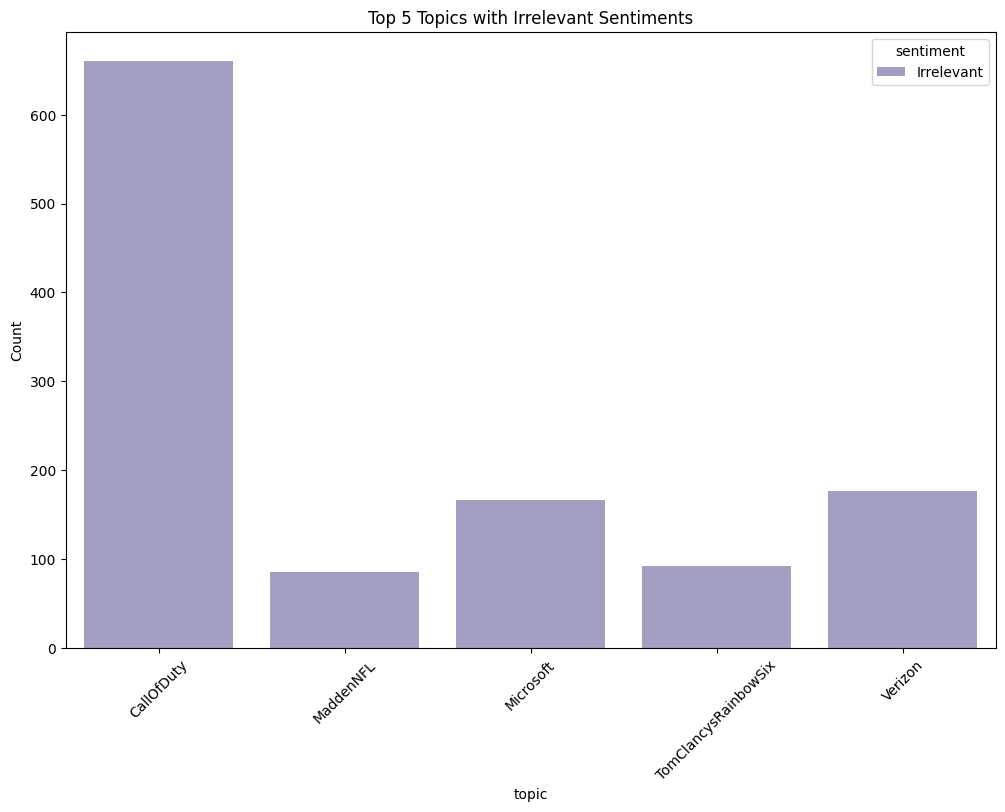

In [88]:
#Top 5 Topics with Irrelevant Sentiments
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['sentiment'] == 'Irrelevant'], x='topic', y='Count',hue = 'sentiment', palette='Purples')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

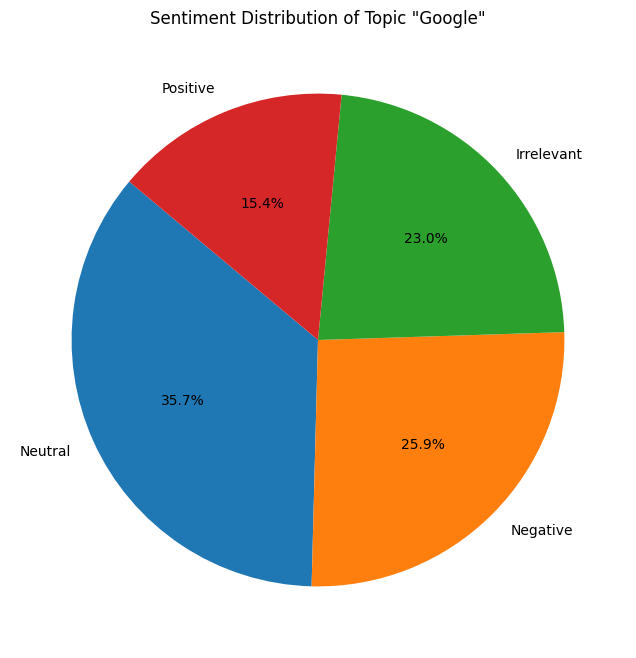

In [90]:
# Filter the dataset to include only entries related to the topic 'Google'
google_data = train[train['topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

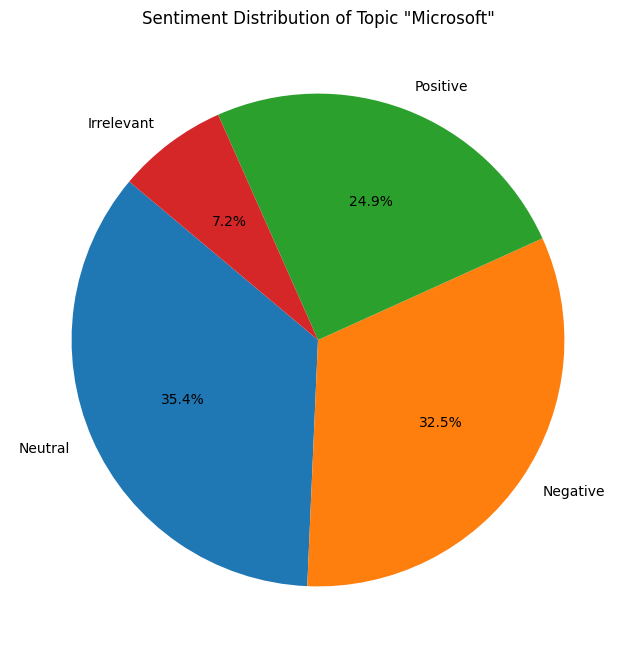

In [92]:
# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = train[train['topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

In [94]:
train['msg_len'] = train['Text'].apply(len)

In [96]:

train

,ID,topic,sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159


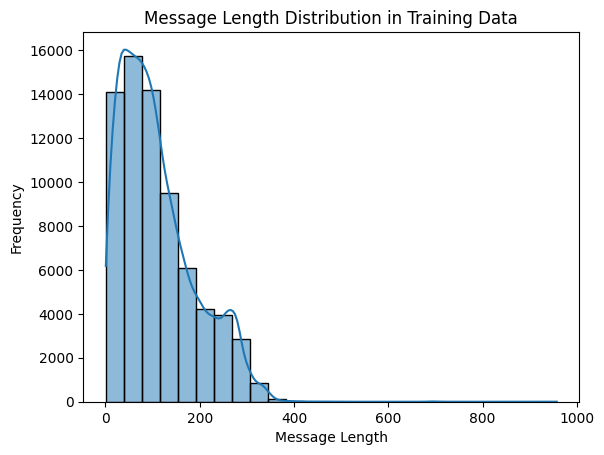

In [98]:
#Plot of message length distribution for training data
sns.histplot(train['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

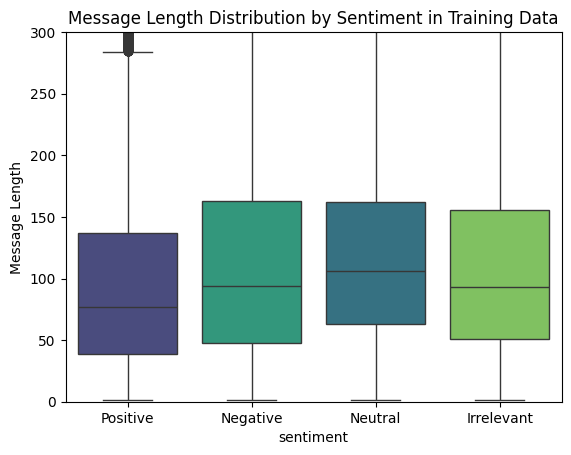

In [102]:
#plot message length distribution by sentiment for training data 
sns.boxplot(data=train, x=train['sentiment'], y='msg_len',hue = 'sentiment', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution by Sentiment in Training Data')
plt.ylabel('Message Length')
plt.xlabel('sentiment')
plt.ylim(0,300)
plt.show() 

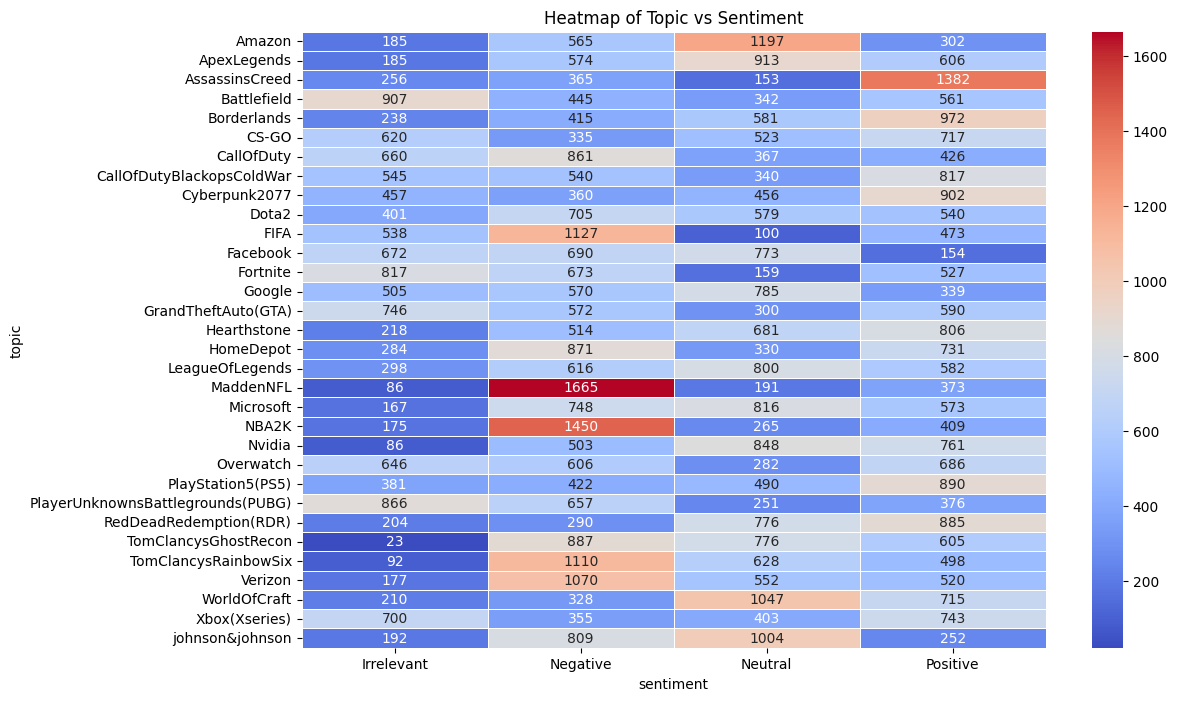

In [104]:

# Create the crosstab
crosstab = pd.crosstab(index=train['topic'], columns=train['sentiment'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('sentiment')
plt.ylabel('topic')

# Show the plot
plt.show()


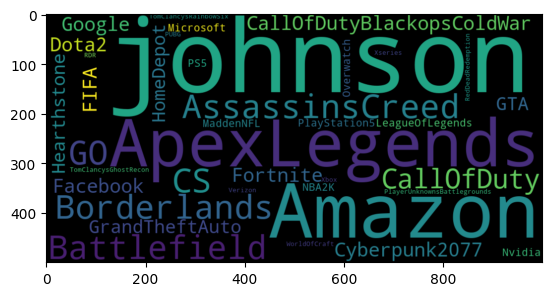

In [106]:
topic_list = ' '.join(crosstab.index)


wc = WordCloud(width=1000, height=500).generate(topic_list)

plt.imshow(wc, interpolation='bilinear')

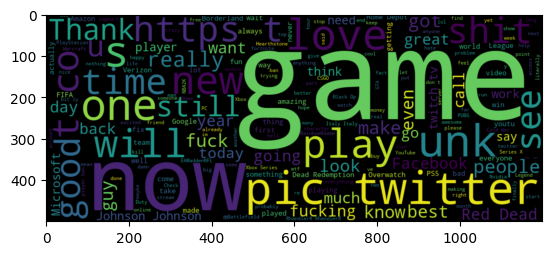

In [108]:
corpus = ' '.join(train['Text'])

wc2 = WordCloud(width=1200, height=500).generate(corpus)

plt.imshow(wc2, interpolation='bilinear')